In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_data():
    data = pd.read_csv('heart2.csv', sep=",")
    
    return data

In [18]:
data = read_data()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [8]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


(303, 14)

In [9]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [10]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [19]:
#data.iloc[1:2,:1] = None
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().values.tolist()
no_disease = data.loc[data['target']==0, 'sex'].value_counts().values.tolist()

In [62]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)


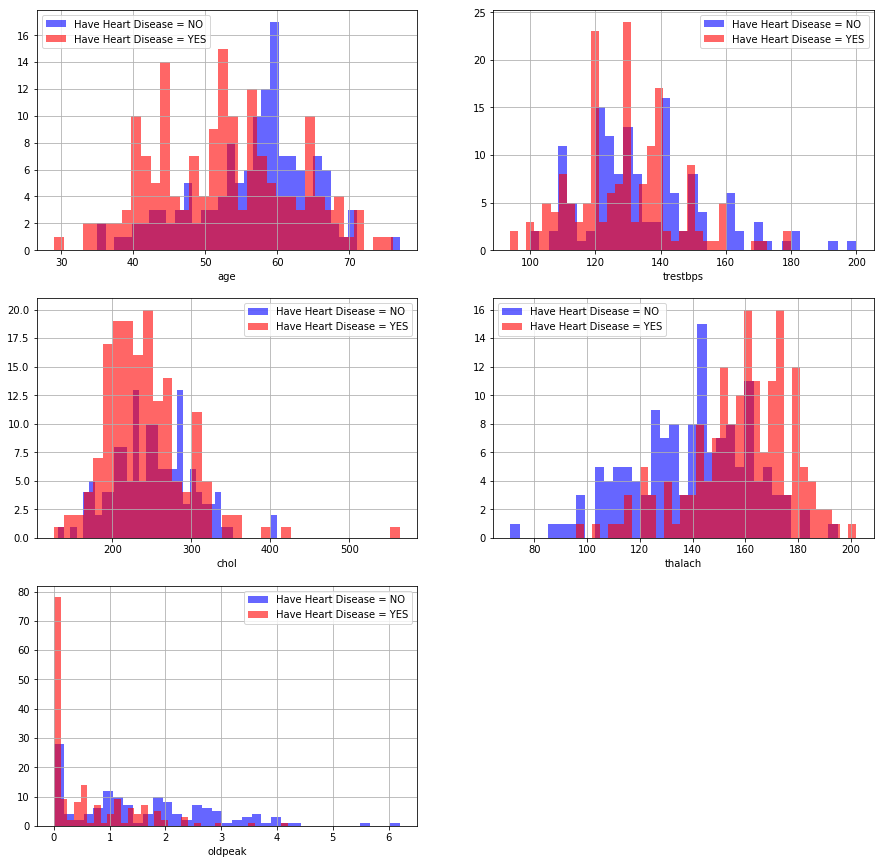

In [64]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(14.5, -0.5)

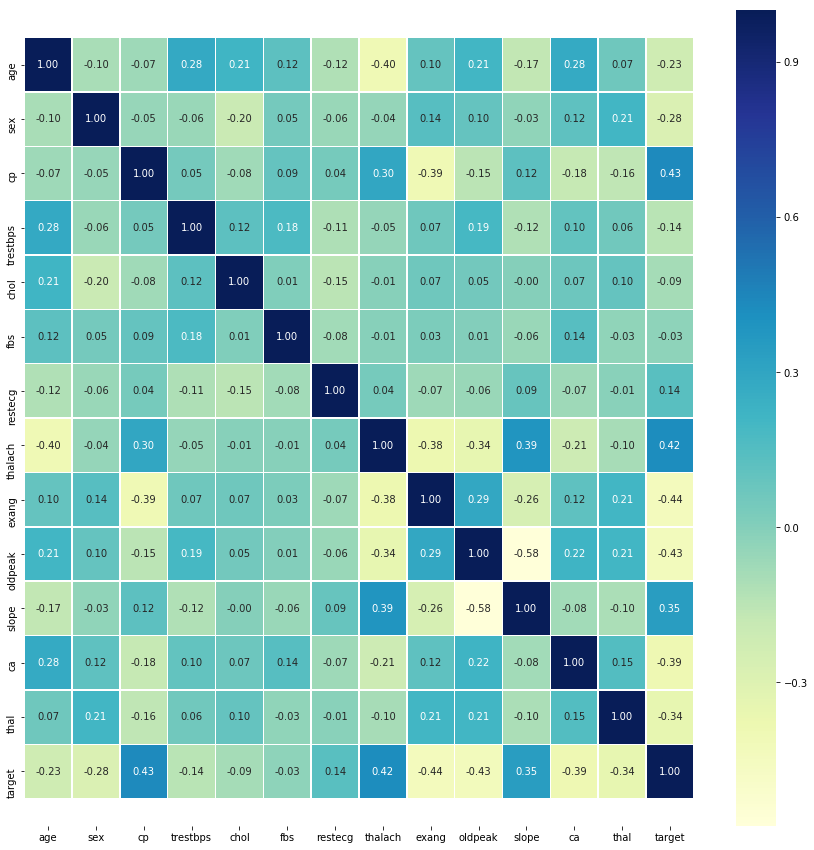

In [69]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [70]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [71]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [72]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [75]:
from sklearn.model_selection import train_test_split

x = dataset.drop('target', axis=1)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
f1-score   0.85   0.88       0.87       0.87          0.87
precision  0.86   0.87       0.87       0.87          0.87
recall     0.85   0.89       0.87       0.87          0.87
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
f1-score   0.85  0.88       0.87       0.87          0.87
precision  0.85  0.88       0.87       0.87          0.87
recall     0.85  0.88       0.87       0.87          0.87
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



#SVM

In [79]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
f1-score   0.93   0.94       0.93       0.93          0.93
precision  0.94   0.93       0.93       0.93          0.93
recall     0.92   0.95       0.93       0.93          0.93
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
f1-score   0.87  0.89       0.88       0.88          0.88
precision  0.86  0.90       0.88       0.88          0.88
recall     0.88  0.88       0.88       0.88          0.88
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



#RandomForest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  micro avg  macro avg  weighted avg
f1-score   1.00   1.00       1.00       1.00          1.00
precision  1.00   1.00       1.00       1.00          1.00
recall     1.00   1.00       1.00       1.00          1.00
support   97.00 115.00     212.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  micro avg  macro avg  weighted avg
f1-score   0.80  0.84       0.82       0.82          0.82
precision  0.80  0.84       0.82       0.82          0.82
recall     0.80  0.84       0.82       0.82          0.82
support   41.00 50.00      91.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]

